# Mini project 10.1.5

# Linear Regression Using Boston Housing Data Set

## Step:  Set up

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


## Step:  Collect the data

In [2]:
## Load the Boston Housing data set
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

## Step:  Assess the data

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Check out the data
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
# A bit of cleaning
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Step:  Explore the data

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
FONTSIZE = 12

### Exercise 2-1:  Visually explore relationship between some variables and price

### Visually explore crime and price

Text(0.5, 1.0, 'Relationship between crime and price')

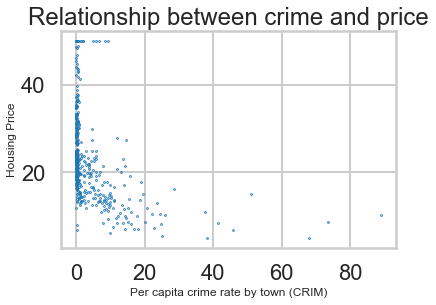

In [13]:
plt.scatter(bos.CRIM, bos.PRICE, s=.5)
plt.xlabel("Per capita crime rate by town (CRIM)", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between crime and price")

The relationship between crime and price:

* Isn't too clear
* Might be linear
* Might be negative (higher crime, lower price)
* Is weak
* Seems to be dominated by low-crime-rate prices
* Has outliers

### Visually explore rooms and price

Text(0.5, 1.0, 'Relationship between rooms and price')

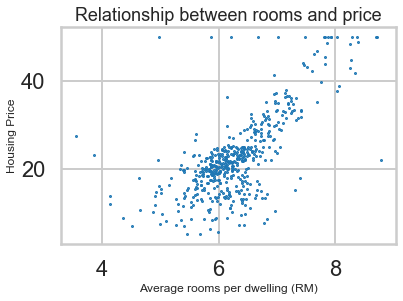

In [14]:
# Scatter plot between *RM* and *PRICE*

plt.scatter(bos.RM, bos.PRICE, s=1)
plt.xlabel("Average rooms per dwelling (RM)", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between rooms and price", fontsize=FONTSIZE*1.5)


The relationship between rooms and price:

* Is very clear
* Is linear
* Is positive (more rooms, higher price)
* Has some (but not a huge number of) outliers

### Visually explore schools and price 

Text(0.5, 1.0, 'Relationship between schools and price')

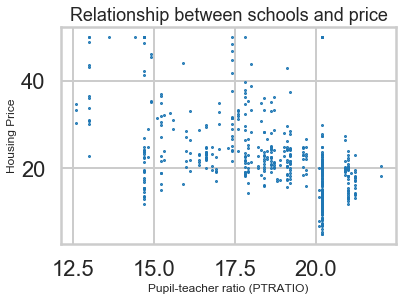

In [15]:
# Scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos.PTRATIO, bos.PRICE, s=1)
plt.xlabel("Pupil-teacher ratio (PTRATIO)", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between schools and price", fontsize=FONTSIZE*1.5)

The relationship between schools and prices:

* Is not too clear
* Has a hint of a negative correlation
    * Some higher-teacher, higher-priced properties
    * Many lower-teacher, lower-priced properties
* Has many outliers

### Visually explore pollution and price 

Text(0.5, 1.0, 'Relationship between pollution and price')

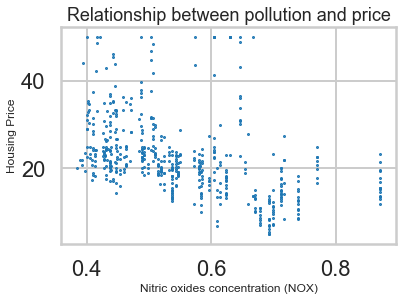

In [16]:
# Scatter plot between *NOX* and *PRICE*

plt.scatter(bos.NOX, bos.PRICE, s=1)
plt.xlabel("Nitric oxides concentration (NOX)", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between pollution and price", fontsize=FONTSIZE*1.5)


The relationship between pollution and price:

* Is not too clear
* Is a bit linear
* Is slightly negative (higher NOX, lower price)
* Has many outliers

### Visually explore commute and price

Text(0.5, 1.0, 'Relationship between commute and price')

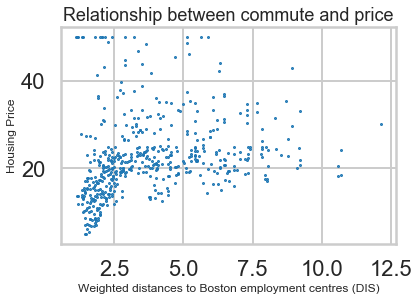

In [17]:
# Scatter plot between *DIS* and *PRICE*

plt.scatter(bos.DIS, bos.PRICE, s=1)
plt.xlabel("Weighted distances to Boston employment centres (DIS)", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between commute and price", fontsize=FONTSIZE*1.5)

The relationship between commute and price:

* Is not too clear
* Might not be linear
* Might start with a positive relation
* Has many outliers

#### Note:  I could also do this with Seaborn

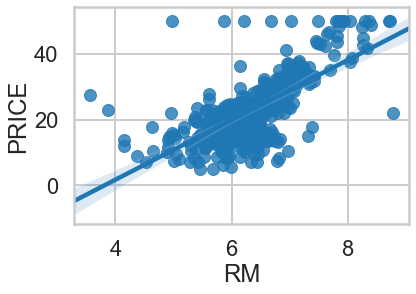

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Exercise 2-2:  Visually explore distributions of features

### Explore the distribution of crimes

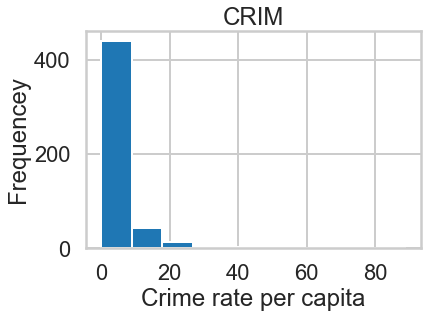

In [19]:
# distribution of crime
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

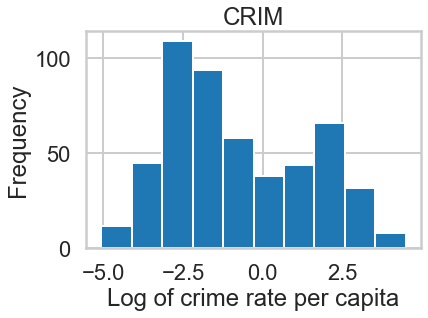

In [20]:
# Add a log tranformation

plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Log of crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Why log transform?

* Helps reduce the left-hand skew of the many low values
* Helps evenly spread the data across our bins

After making the transformation, I notice:

* Many low rates.  Aka, the negative logs.
* Want to confirm:  We're base 10, right?

### Explore the distribution of rooms

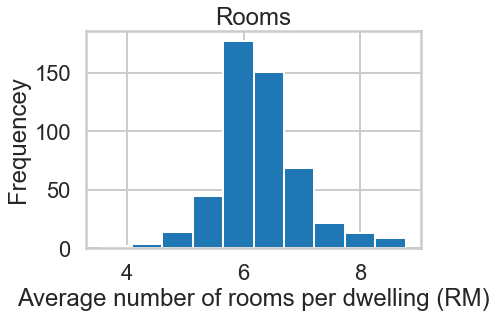

In [21]:
plt.hist(bos.RM)
plt.title("Rooms")
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Frequencey")
plt.show()

This looks rather normal.

### Explore the distribution of education

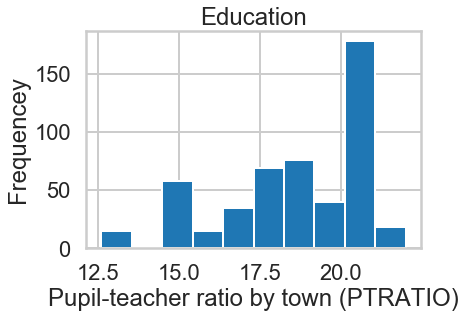

In [22]:
plt.hist(bos.PTRATIO)
plt.title("Education")
plt.xlabel("Pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Frequencey")
plt.show()

This doesn't look normal.  One value dominates.

### Explore the relationship between rooms and education

Text(0.5, 1.0, 'Relationship between education and rooms')

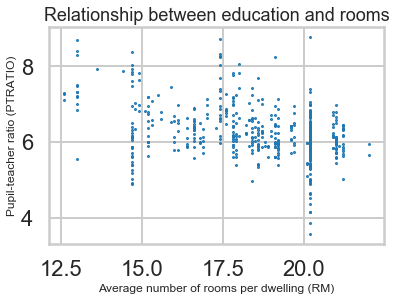

In [23]:
plt.scatter(bos.PTRATIO, bos.RM, s=1)
plt.xlabel("Average number of rooms per dwelling (RM)", fontsize=FONTSIZE)
plt.ylabel("Pupil-teacher ratio (PTRATIO)", fontsize=FONTSIZE)
plt.title("Relationship between education and rooms", fontsize=FONTSIZE*1.5)

The relationship between education and size of homes:

* Isn't all that clear

### Explore the distribution of commute

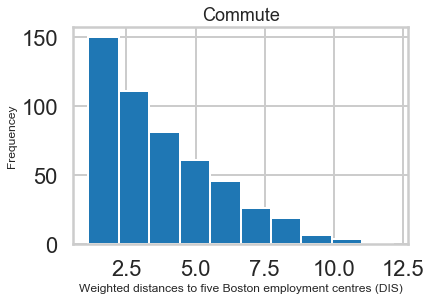

In [24]:
plt.hist(bos.DIS)
plt.title("Commute", fontsize=FONTSIZE*1.5)
plt.xlabel("Weighted distances to five Boston employment centres (DIS)", fontsize=FONTSIZE)
plt.ylabel("Frequencey", fontsize=FONTSIZE)
plt.show()

### Explore the distribution of pollution

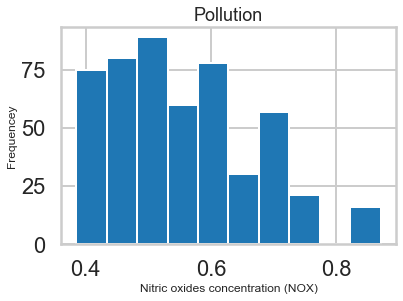

In [25]:
plt.hist(bos.NOX)
plt.title("Pollution", fontsize=FONTSIZE*1.5)
plt.xlabel("Nitric oxides concentration (NOX)", fontsize=FONTSIZE)
plt.ylabel("Frequencey", fontsize=FONTSIZE)
plt.show()

### Explore the relationship between pollution and commute

Text(0.5, 1.0, 'Relationship between pollution and commute')

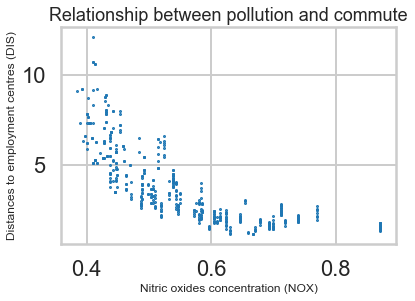

In [26]:
plt.scatter(bos.NOX, bos.DIS, s=1)
plt.xlabel("Nitric oxides concentration (NOX)", fontsize=FONTSIZE)
plt.ylabel("Distances to employment centres (DIS)", fontsize=FONTSIZE)
plt.title("Relationship between pollution and commute", fontsize=FONTSIZE*1.5)

The relationship between pollution and commute:

* Is more clear (than I expected)
* Is negative (less pollution, shorter commutes)
* Has few outliers (than I expected)

Is this just the observation that the employment centers are more polluted?

## Step:  Build and explore the model

### Build a linear model of rooms and price (with statsmodels)

In [27]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           2.49e-74
Time:                        07:12:09   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

### Exercise 3-1:  Explore the relationship between predicted and actual prices

Text(0.5, 1.0, 'Relationship between predicted and actual price')

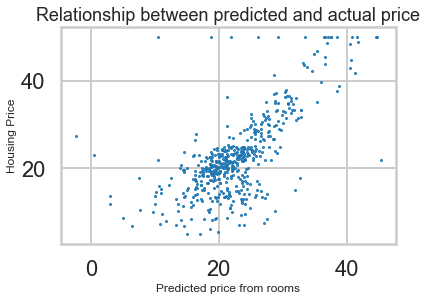

In [29]:
# Use statsmodels for the predicted values
plt.scatter(m.fittedvalues, bos.PRICE, s=1)
plt.xlabel("Predicted price from rooms", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between predicted and actual price", fontsize=FONTSIZE*1.5)


The relationship between predicted and actual price:

* Is clear
* Is linear, positive, and strong
* Has outliers 

This means that rooms alone has predictive power.

There is some 'weirdness':

* There's more error (or variance) at the lower prices and lower rooms
* There are outliers that hit a price ceiling regardless of rooms

### Build a mutiple regression model (with sklearn)

In [30]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# Creates a LinearRegression object
lm = LinearRegression()

In [31]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Exercise 3-2: Validate the model's assumptions

Yes, you can change the model to not fit an intercept.

* Mechanically, you can use the parameter:  fit_intercept=False.  
* Doing so forces the Y intercept at 0, rather than allowing the model to determine the line of best fit.
* It seems like doing so reduces fit.  Aka, overall accuracy of the model.  Presumably, you'd do for improved values at the low-value X and for better explanation, especially where it doesn't make sense for for X of 0 to have Y values.

Part of challenge of linear regressions is ensuring that all of the assumptions are met.  

* Here, we're asking about the assumptions about residuals.  
* For sure, residuals should be normally distributed.  
* But there are more assumptions about residuals:  
    * Residuals need to be independent.  
    * Residuals should have means of zero.  
    * Variance of errors across residuals should be similar (aka, homoscedastic).  
    * Residuals should not be auto correlated.  
* Why?  As I see, we're trying to validate that the residuals are simply random errors.

False.  Linear regressions does not assume that dependent variable is normally distributed.

### Estimate intercept and coefficients (with sklearn)

In [32]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [33]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [34]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [35]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

### Exercise 3-3:  Explore the model via histogram and scatterplot

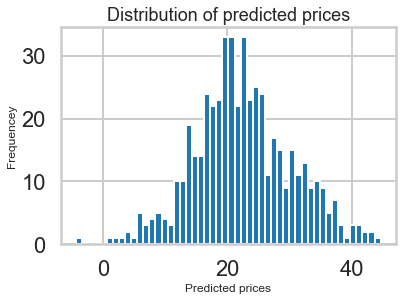

The mean is 22.532806324110677
The standard deviation is 7.907257740483541


In [36]:
# Plot a historgram of all predicted prices
plt.hist(lm.predict(X), bins=50)
plt.title("Distribution of predicted prices", fontsize=FONTSIZE*1.5)
plt.xlabel("Predicted prices", fontsize=FONTSIZE)
plt.ylabel("Frequencey", fontsize=FONTSIZE)
plt.show()

print ('The mean is {}'.format(np.mean(lm.predict(X))))
print ('The standard deviation is {}'.format(np.std(lm.predict(X))))

Predicted prices look to be normally distributed, for the most part.

* There seems to be be some gaps in the 'middle' of the distribution.
* Maybe, there's a bit of skew towards higher prices
* There are surprisingly few outliers in the high-price range.
* There's an odd negative outlier in the low price range (Someone paid to get rid of the property?)
* Maybe, we'd just toss the 'negative' sales prices.  That is, they seem like abhorrent transactions (part of a clean up, rather than a sale).  And there aren't many of them.

Text(0.5, 1.0, 'Relationship between predicted and actual price')

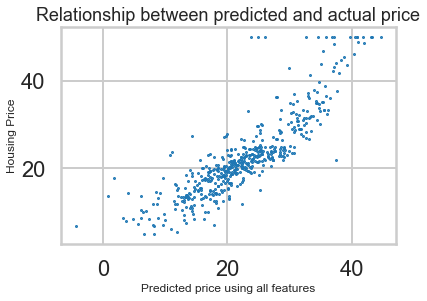

In [37]:
# Look at correlation of price and predicted price
plt.scatter(lm.predict(X), bos.PRICE, s=1)
plt.xlabel("Predicted price using all features", fontsize=FONTSIZE)
plt.ylabel("Housing Price", fontsize=FONTSIZE)
plt.title("Relationship between predicted and actual price", fontsize=FONTSIZE*1.5)

The relationship between predicted price (using all variables) and price:

* clear
* linear, positive and strong
* more correlated than than the model that rooms only



Here's a quick comparison of the two models:

* Sklearn:  Very easy to use; has a single approach for many models; seems more data-table oriented.
* Statsmodels:  Gives a lots of stats info by default; gives control about how to specify the model via a clean 'formula'; is familiar to those using R.

## Step:  Evaluate the model

In [38]:
# Calc an RSS
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


In [39]:
# Calc an ESS
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Exercise 3-4:  Evaluate the relationship between education and housing

In [40]:
# Create a table and linear regression model
lm_edu = LinearRegression()
lm_edu.fit(X[['PTRATIO']], bos.PRICE)

## Print out the coefficients
print('Estimated intercept coefficient: {}'.format(lm_edu.intercept_))
print('Number of coefficient: {}'.format(len(lm_edu.coef_)))
print('Estimated coefficient: {}'.format(lm_edu.coef_))

Estimated intercept coefficient: 62.34462747483266
Number of coefficient: 1
Estimated coefficient: [-2.1571753]


In [41]:
# Calc r-squared using basic formula
ess = np.sum((lm_edu.predict(X[['PTRATIO']]) - np.mean(bos.PRICE)) ** 2)
rss = np.sum((bos.PRICE - lm_edu.predict(X[['PTRATIO']])) ** 2)
tss = ess + rss 
r_sq = ess / tss
print('R-squared: {}'.format(r_sq))

# Calc f stat using basic formula
n = len(X[['PTRATIO']])
k = 1
f_stat = (r_sq / (1 - r_sq)) * ((n - k - 1) / k)
print('F-stat: {}'.format(f_stat))



R-squared: 0.25784731800922295
F-stat: 175.10554287569542


Some takeaways:

* An r-squared of 25% isn't that great
* The F-stat at 175 dominates the p value of, essentially, zero
* On the relationship between F-stat and the T-stat in linear regression:  The partial F-stat on a single variable is equal to the square of the T-stat.

### Exercises:  3-5:  Evaluate a multiple regression analysis

Note:  I'm switching to statsmodel to get a clean output of the basic stats

In [42]:
m_red = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m_red.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           6.15e-98
Time:                        07:12:10   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

The F-stat is 245.2, and it's p-value is pretty much zero.  The model is statistically significant.

The adjusted r-squared is 0.592.  That is, the model accounts for about 60% of the variability of prices.

All explanatory variables are significant.  Each feature's p-value is approximately zero.

In looking for the most significant feature:

* Rooms (RM) jumps out when comparing t-stats across variables.  Education (RM)'s (absolute) value is more than 2 times that of the next-closest, which is education (PTRATIO).
* Also, I could calculate an r-squared for each individual features to get a better feel for that feature's  explanatory power.

### Exercise 4:  Compare models

In [43]:
# Calc full model
m_ful = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + DIS',bos).fit()
print(m_ful.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 24 Dec 2019   Prob (F-statistic):          8.11e-108
Time:                        07:12:10   Log-Likelihood:                -1583.3
No. Observations:                 506   AIC:                             3179.
Df Residuals:                     500   BIC:                             3204.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6319      5.033      4.298      0.0

Compare f-stat of full and reduced models

* I presume this stat is already built into statsmodels (but I didn't see it after a quick Google search)
* Alternatively, I presume I could calculate the stat (but I don't see how to get the residual sum of squares from statsmodels after a quick Google search). 

In [44]:
# Calc an f-stat to compare full v. reduced
rss_ful = 2000
df_ful = 506 - 5 - 1
rss_red = 1000
df_red = 506 - 3 - 1
f_stat_ful_v_red = ((rss_red - rss_ful) / (df_red - df_ful)) / (rss_ful / df_ful)
print('The f-stat is: {}'.format(f_stat_ful_v_red))

The f-stat is: -125.0


Compare the AIC of the full and reduced models

* The full models AIC is 3179.
* The reduced models AIC is 3232.
* Lower AIC indicates better a fitting model.
* The full model is (slightly, I presume) better fitting.

### Exercise 5:  Evaluate the assumptions of linear regression

#### Construct a fitted values versus residuals plot

Text(0.5, 1.0, 'Relationship between fitted values and residuals')

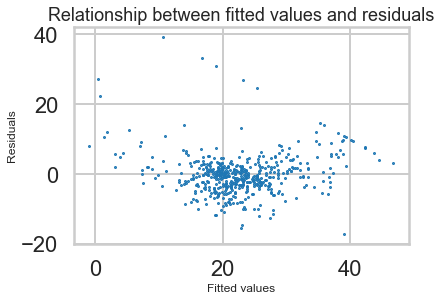

In [45]:
plt.scatter(m_red.fittedvalues, m_red.resid, s=1)
plt.xlabel("Fitted values", fontsize=FONTSIZE)
plt.ylabel("Residuals", fontsize=FONTSIZE)
plt.title("Relationship between fitted values and residuals", fontsize=FONTSIZE*1.5)

Takeaways:

* The relationship between fitted values and residuals can show non-linearity, unequal error variances, and outliers.
* This graph looks mostly random around 0.
* There seems to be some oddness around the lower and upper values.
* Plus, there are some odd outliers.

#### Construct a quantile plot of the residuals

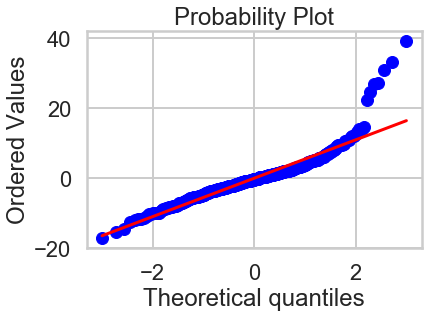

In [46]:
stats.probplot(m_red.resid, plot=plt)
plt.show()

Takeaways:

* This plot helps validate our assumptions of normality of residuals
* The upper quantile looks like it has outliers

#### Comparing fitted and residuals v. Q-Q plots

* Both are looking at residuals
* Both shed light on outliers.
* But they each have a different focus

#### Identify outliers

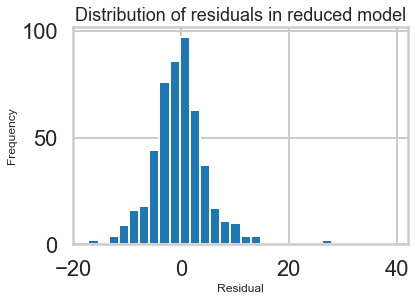

In [47]:
# Visually inspect from histogram
plt.hist(m_red.resid, bins=30)
plt.title("Distribution of residuals in reduced model", fontsize=FONTSIZE*1.5)
plt.xlabel("Residual", fontsize=FONTSIZE)
plt.ylabel("Frequency", fontsize=FONTSIZE)
plt.show()

There look to be some outliers.  Maybe, above 20.

In [48]:
m_red.resid[m_red.resid > 20]

365    27.127667
367    22.336529
368    39.298836
369    26.814372
370    24.534761
371    30.991160
372    33.310083
dtype: float64

In [49]:
m_red.resid[m_red.resid < -20]

Series([], dtype: float64)

Takaways:

* There are 7 values where residuals are > 20. 
* They are:  365, 367, 368, 369, 370, 371, 372
* There are no values that are < -20.
* But it seems odd that all are 'in a row.'  I wonder what 'order' means for our observations.

#### Construct a leverage plot

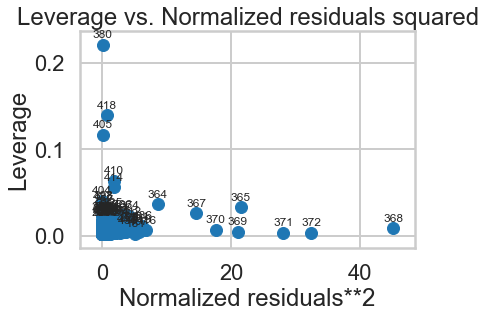

In [50]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
leverage = plot_leverage_resid2(m_red)

The high leverage points are:

* 380, 418, 405
* 368, 372, 371, 365
    

#### Build model without outliers and leverage points 

In [51]:
values_to_remove = [365, 367, 368, 369, 370, 371, 372, 380, 418, 405]
bos_cleaned = bos.drop(values_to_remove, axis=0)
m_red_cleaned = ols('PRICE ~ CRIM + RM + PTRATIO',bos_cleaned).fit()
print(m_red_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     414.5
Date:                Tue, 24 Dec 2019   Prob (F-statistic):          3.19e-134
Time:                        07:12:12   Log-Likelihood:                -1468.9
No. Observations:                 496   AIC:                             2946.
Df Residuals:                     492   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0479      3.294     -1.836      0.0

Takeaways:

* The model improved after cleaning up the outliers and leverage points.
* The r-squared of the model with cleaned data was about 72%--an improvement from the full data's r-squared of  60%.
* The AIC of the cleaned data was 2946, an improvement over the AIC of the full data of 3179.
* I could also compare the F-stats of the two models.